# Introduction To Machine Learning.

- Machine Learning is the science (and art) of programming computers so they can learn from data.
Here is a slightly more general definition:
  >***Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed.***
  >***Arthur Samuel,1959***

### And a more engineering-oriented one:
- A computer program is said to learn from experience E with respect to some task T and some performance measure P, if   its performance on T, as measured by P, improves with experience E.

## Supervised Learning

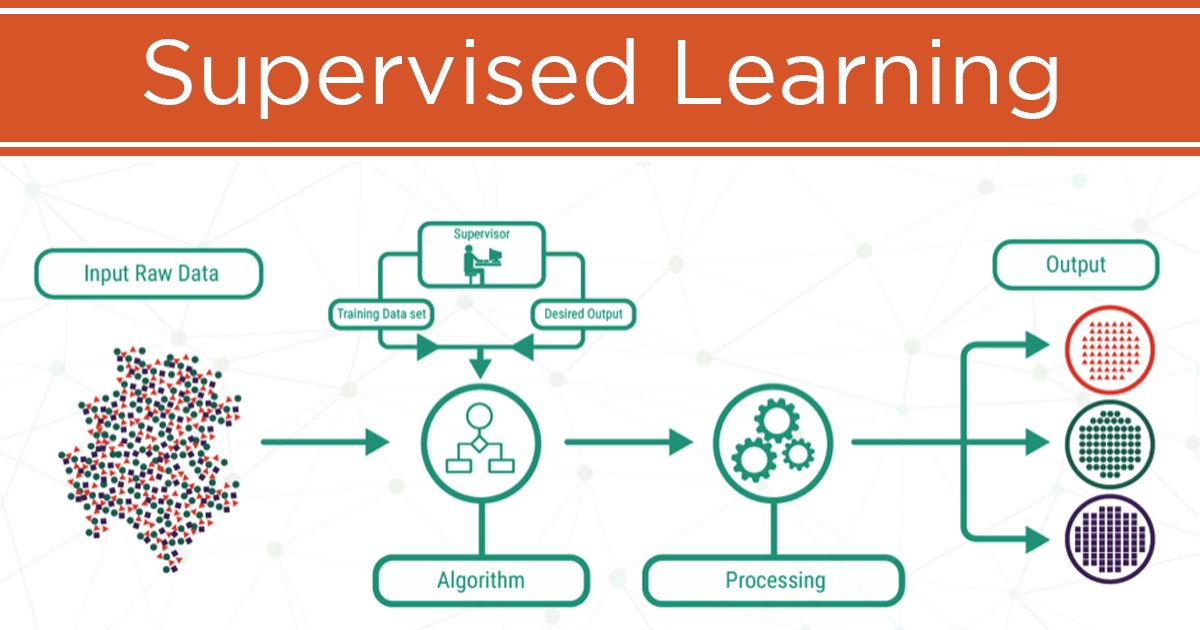

## Unsupervised learning
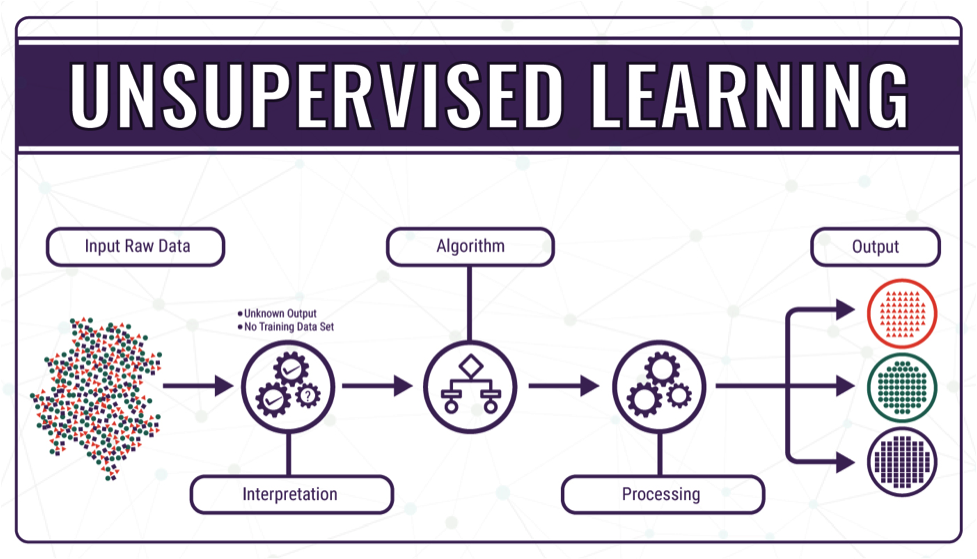

## Reinforcement Learning
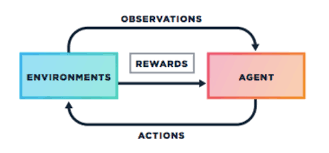

### Some Terms used in  Machine Learning are:
- ***Model*** - Simply a system for mapping inputs to outputs; Represents a theory about a problem.
- ***Generalization*** - A model that makes accurate predictions on unseen data.
- ***Feature*** - Features are individual independent variables that act as the input in your system. Prediction models use features to make predictions. New features can also be obtained from old features using a method known as ‘feature engineering’. More simply, you can consider one column of your data set to be one feature. Sometimes these are also called attributes. And the number of features are called dimensions.
- ***Label*** - Labels are the final output. You can also consider the output classes to be the labels. When data scientists speak of labeled data, they mean groups of samples that have been tagged to one or more labels.
- ***Target***: The target is whatever the output of the input variables. It could be the individual classes that the input variables maybe mapped to in case of a classification problem or the output value range in a regression problem. If the training set is considered then the target is the training output values that will be considered.
- ***Regularization***: Regularization is the method to estimate a preferred complexity of the machine learning model so that the model generalizes and the over-fit/under-fit problem is avoided. This is done by adding a penalty on the different parameters of the model thereby reducing the freedom of the model.
- ***Parameter and Hyper-Parameter***: Parameters are configuration variables that can be thought to be internal to the model as they can be estimated from the training data. Algorithms have mechanisms to optimize parameters. On the other hand, hyperparameters cannot be estimated from the training data. Hyperparameters of a model are set and tuned depending on a combination of some heuristics and the experience and domain knowledge of the data scientist.
- ***Training***: While training for machine learning, you pass an algorithm with training data. The learning algorithm finds patterns in the training data such that the input parameters correspond to the target. The output of the training process is a machine learning model which you can then use to make predictions. This process is also called “learning”.
- ***Algorithm***: Machine Learning algorithm is the hypothesis set that is taken at the beginning before the training starts with real-world data. When we say Linear Regression algorithm, it means a set of functions that define similar characteristics as defined by Linear Regression and from those set of functions we will choose one function that fits the most by the training data.

### Overfitting and Underfitting
- ***Overfitting***: An important consideration in machine learning is how well the approximation of the target function that has been trained using training data, generalizes to new data. Generalization works best if the signal or the sample that is used as the training data has a high signal to noise ratio. If that is not the case, generalization would be poor and we will not get good predictions. A model is overfitting if it fits the training data too well and there is a poor generalization of new data.

- ***Underfitting***:occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Specifically, underfitting occurs if the model or algorithm shows low variance but high bias.
> In Summary
    - Overfitting: too much reliance on the training data.(High Variance,low bias)
    - Underfitting: a failure to learn the relationships in the training data(Low variance,high bias)
    - High Variance: model changes significantly based on training data
    - High Bias: assumptions about model lead to ignoring training data
    - Overfitting and underfitting cause poor generalization on the test set
    - A validation set for model tuning can prevent under and overfitting
    
    

## Problem Statement:

- Given Sepal and Petal lengths and width predict the class of Iris



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris/Iris.csv')


### Preview of Data

    There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
    There are no null values, so we don't have to worry about that.
    There are 50 observations of each species (setosa, versicolor, virginica).



In [2]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


### Data Visualization

    After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
    There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).



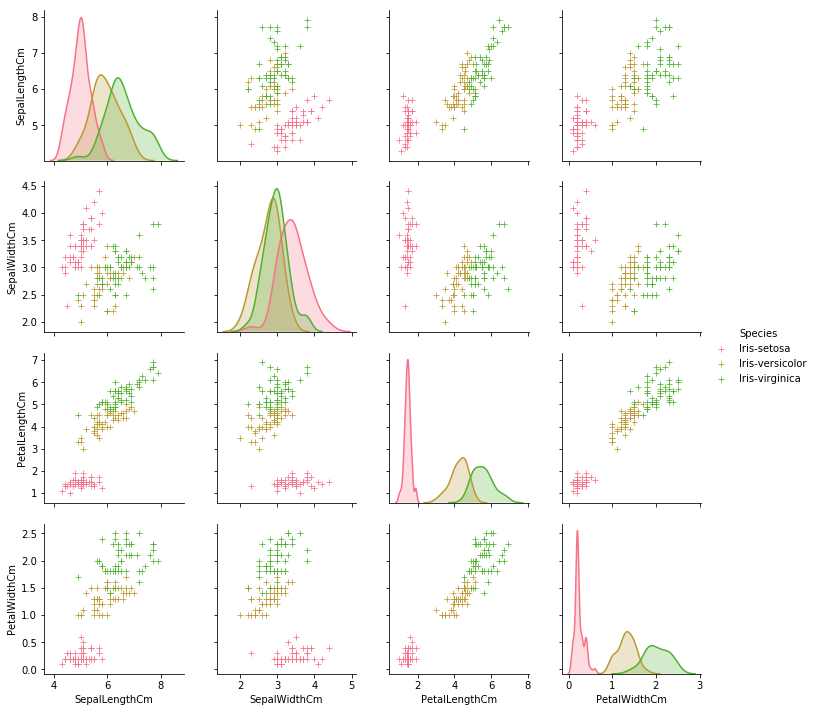

In [6]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

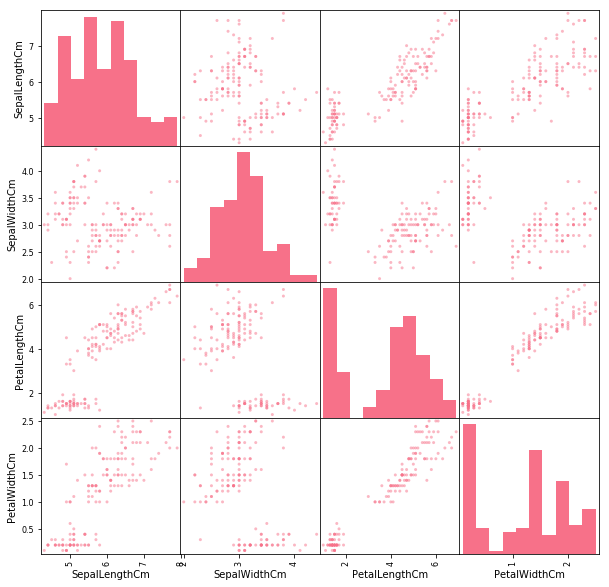

In [7]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(tmp,figsize=(10,10))
plt.show()

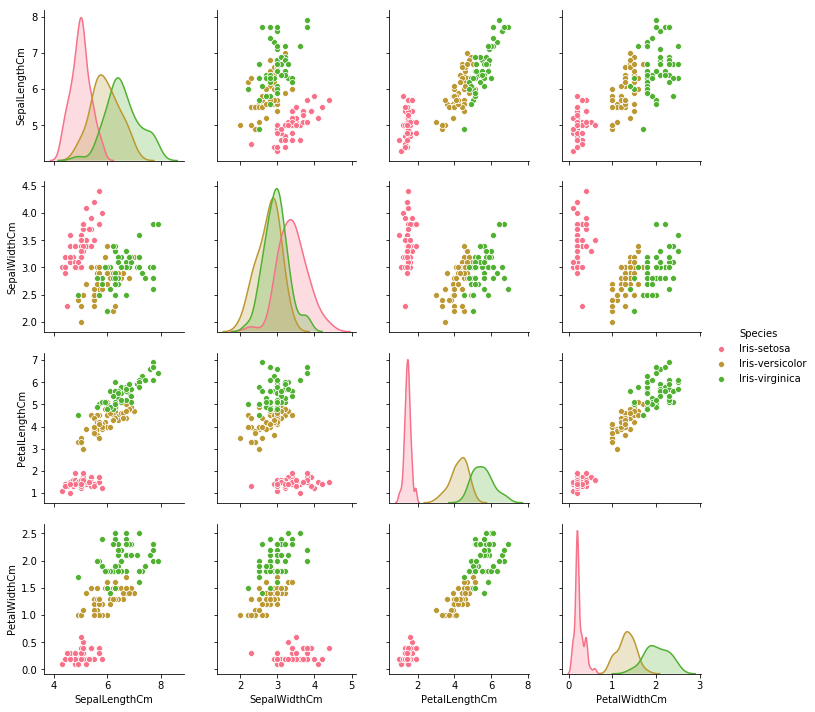

In [8]:
sns.pairplot(tmp, hue="Species")

## Modellling with scikitlearn

In [9]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)



(150, 4)
(150,)



## Train and test on the same dataset

    This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen   before.
    There is also a risk of overfitting the training data.



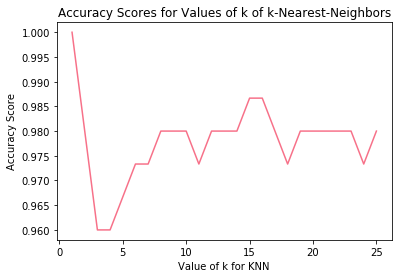

In [10]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [11]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.96



### Split the dataset into a training set and a testing set
#### Advantages

    By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
    This ensures that we won't use the same observations in both sets.
    More flexible and faster than creating a model using all of the dataset for training.

#### Disadvantages

    The accuracy scores for the testing set can vary depending on what observations are in the set.
    This disadvantage can be countered using k-fold cross-validation.

#### Notes

    The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
    As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
    If a model is too complex or not complex enough, the testing accuracy is lower.
    For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


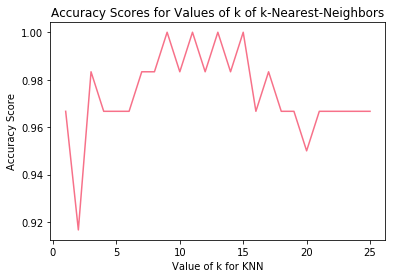

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Choosing KNN to Model Iris Species Prediction with k = 12

After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.


In [15]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])


array(['Iris-versicolor'], dtype=object)

## Applying different Classification models

- Support Vector Machines

In [16]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
# Seperating the data into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [18]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
accuracy is 0.9333333333333333


/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/linda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


- Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


## Challenge For You!

Try this past competition on zindi:
https://zindi.africa/competitions/traffic-jam-predicting-peoples-movement-into-nairobi/data

Incase you get stuck,reach out!
    
    